# Twitter Sentiments Analysis

### IMPORT LIBRARIES AND DATASETS

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')


In [3]:
# Load The Dataset

df = pd.read_csv("twitter.csv")
df.head(5)
print("Successfully Data Read")

Successfully Data Read


In [4]:
# Get The Data Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [5]:
# Drop The 'id' Column From Dataset

df = df.drop(['id'], axis=1)

### EXPLORE DATASET

<AxesSubplot:xlabel='label', ylabel='count'>

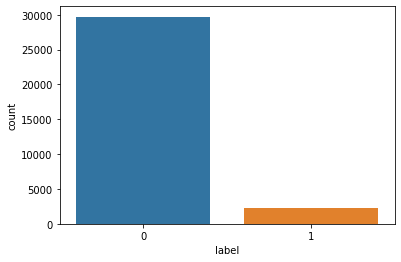

In [6]:
sns.countplot(df['label'], label = 'count')

In [7]:
# Let's Get The Length of The Messages

df['length'] = df['tweet'].apply(len)

In [8]:
df

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63
31960,1,"@user #sikh #temple vandalised in in #calgary,...",67


<AxesSubplot:ylabel='Frequency'>

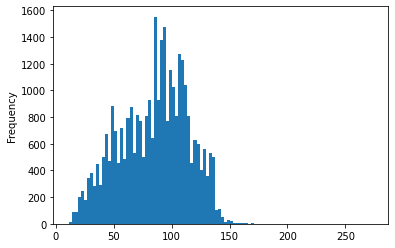

In [9]:
df['length'].plot(bins=100, kind='hist')

In [10]:
df.describe()

,label,length
count,31962.000000,31962.000000
mean,0.070146,84.739628
std,0.255397,29.455749
min,0.000000,11.000000
25%,0.000000,63.000000
50%,0.000000,88.000000
75%,0.000000,108.000000
max,1.000000,274.000000


In [11]:
# Let's See The Shortest Message

df[df['length'] == 11]['tweet'].iloc[0]

'i love you '

In [12]:
# Let's See The Longest Message

df[df['length'] == 84]['tweet'].iloc[0]

'my mom shares the same bihday as @user   bihday snake! see you this weekend ð\x9f\x99\x8cð\x9f\x8f¼'

In [13]:
positive = df[df['label']==0]

In [14]:
positive

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31956,0,off fishing tomorrow @user carnt wait first ti...,61
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63


In [15]:
negative = df[df['label']==1]

In [16]:
negative

,label,tweet,length
13,1,@user #cnn calls #michigan middle school 'buil...,74
14,1,no comment! in #australia #opkillingbay #se...,101
17,1,retweet if you agree!,22
23,1,@user @user lumpy says i am a . prove it lumpy.,47
34,1,it's unbelievable that in the 21st century we'...,104
...,...,...,...
31934,1,lady banned from kentucky mall. @user #jcpenn...,59
31946,1,@user omfg i'm offended! i'm a mailbox and i'...,82
31947,1,@user @user you don't have the balls to hashta...,112
31948,1,"makes you ask yourself, who am i? then am i a...",87


### PLOT THE WORDCLOUD

In [17]:
sentences = df['tweet'].tolist()

In [18]:
sentences

[' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run',
 "@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked",
 '  bihday your majesty',
 '#model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦  ',
 ' factsguide: society now    #motivation',
 '[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  ',
 ' @user camping tomorrow @user @user @user @user @user @user @user dannyâ\x80¦',
 "the next school year is the year for exams.ð\x9f\x98¯ can't think about that ð\x9f\x98\xad #school #exams   #hate #imagine #actorslife #revolutionschool #girl",
 'we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  â\x80¦ ',
 " @user @user welcome here !  i'm   it's so #gr8 ! ",
 ' â\x86\x9d #ireland consume

In [19]:
# Get The Length of Sentences

len(sentences)

31962

In [20]:
sentences_as_one_string = " ".join(sentences)

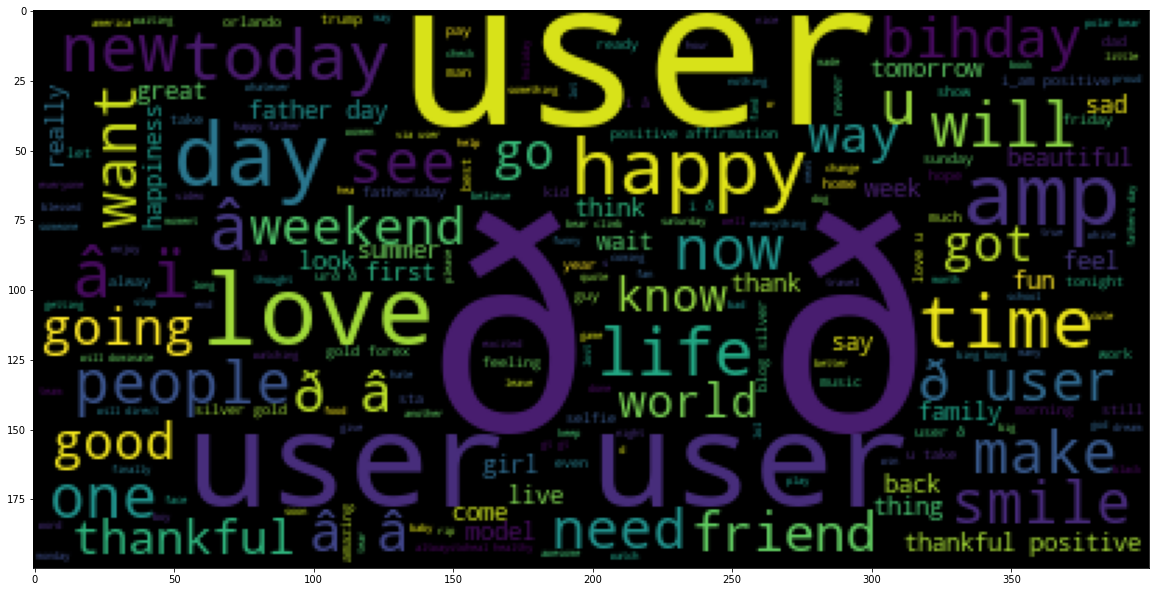

In [21]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

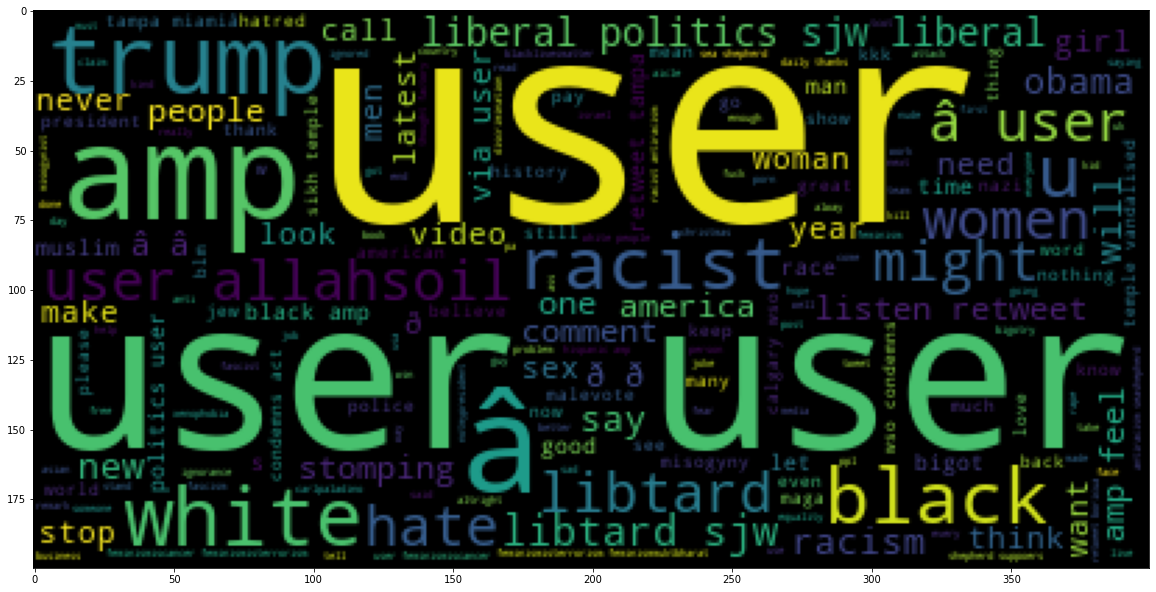

In [22]:
negative_tweets = negative['tweet'].tolist()
negative_tweets_as_one_string = ''.join(negative_tweets)

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negative_tweets_as_one_string))

### PERFORM DATA CLEANING - REMOVE PUNCTUATION FROM TEXT

In [23]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [24]:
Test = 'Good morning beautiful people :)... I am having fun learning Machine learning and AI!!'

In [25]:
Test_punc_removed = [char for char in Test if char not in string.punctuation]

In [26]:
Test_punc_removed

['G',
 'o',
 'o',
 'd',
 ' ',
 'm',
 'o',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'b',
 'e',
 'a',
 'u',
 't',
 'i',
 'f',
 'u',
 'l',
 ' ',
 'p',
 'e',
 'o',
 'p',
 'l',
 'e',
 ' ',
 ' ',
 'I',
 ' ',
 'a',
 'm',
 ' ',
 'h',
 'a',
 'v',
 'i',
 'n',
 'g',
 ' ',
 'f',
 'u',
 'n',
 ' ',
 'l',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'M',
 'a',
 'c',
 'h',
 'i',
 'n',
 'e',
 ' ',
 'l',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'a',
 'n',
 'd',
 ' ',
 'A',
 'I']

In [27]:
# Join The Characters Again To Form The String

Test_punc_removed_join = ''.join(Test_punc_removed)

Test_punc_removed_join

'Good morning beautiful people  I am having fun learning Machine learning and AI'

### PERFORM DATA CLEANING - REMOVE STOPWORDS


In [28]:
import nltk #Natural Language Toolkit

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\NASIR
[nltk_data]     KHAN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
# You've To Download Stopwords Packages To Execute This Command

from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [30]:
Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]

In [31]:
# Only Important (no so common) Words are Left

Test_punc_removed_join_clean

['Good',
 'morning',
 'beautiful',
 'people',
 'fun',
 'learning',
 'Machine',
 'learning',
 'AI']

### PERFORM COUNT VECTORIZATION (TOKENIZATION)

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

sample_data = ['This is the first paper.','This document is the second paper.','And this is the third one.','Is this the first paper?']

vectorizer = CountVectorizer()

X = vectorizer.fit_transform(sample_data)


In [33]:
print(vectorizer.get_feature_names())

['and', 'document', 'first', 'is', 'one', 'paper', 'second', 'the', 'third', 'this']


In [34]:
print(X.toarray())

[[0 0 1 1 0 1 0 1 0 1]
 [0 1 0 1 0 1 1 1 0 1]
 [1 0 0 1 1 0 0 1 1 1]
 [0 0 1 1 0 1 0 1 0 1]]


In [35]:
sample_data2 = ['Hello World','Hello Hello World','Hello World world world']

vectorizer = CountVectorizer()
X_challenge = vectorizer.fit_transform(sample_data2)
print(X_challenge.toarray())

[[1 1]
 [2 1]
 [1 3]]


### CREATE A PIPELINE TO REMOVE PUNCTUATIONS, STOPWORDS AND PERFORM COUNT VECTORIZATION

In [36]:
# Let's Define A Pipeline To Clean-Up All The Messages
# The Pipeline Perform The Following:
# 1. Remove Punctuation 2. Remove Stopwords

def message_clean(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower not in stopwords.words('english')]
    
    return Test_punc_removed_join_clean


In [37]:
# Let's Test The Newly Added Function

df_clean = df['tweet'].apply(message_clean)

In [38]:
# Show The Cleaned Up Version
print(df_clean[5])

['22', 'huge', 'fan', 'fare', 'and', 'big', 'talking', 'before', 'they', 'leave', 'chaos', 'and', 'pay', 'disputes', 'when', 'they', 'get', 'there', 'allshowandnogo']


In [39]:
# Show The Original Version
print(df['tweet'][5])

[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  


In [40]:
from sklearn.feature_extraction.text import CountVectorizer

# Define The Cleaning Pipeline We Define Earlier
vectorizer = CountVectorizer(analyzer = message_clean)
tokenizer = CountVectorizer(analyzer= message_clean, dtype = 'uint8').fit_transform(df['tweet']).toarray()

In [41]:
print(tokenizer.shape)

(31962, 47522)


In [42]:
X = tokenizer

In [43]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [44]:
y = df['label']

## TRAIN MODEL

In [45]:
X.shape

(31962, 47522)

In [46]:
y.shape

(31962,)

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### Naive Bayes

In [49]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)
y_predict = NB_classifier.predict(X_test)

MultinomialNB()

**Assess Trained Model Performance**

In [48]:
from sklearn.metrics import classification_report, confusion_matrix

<AxesSubplot:>

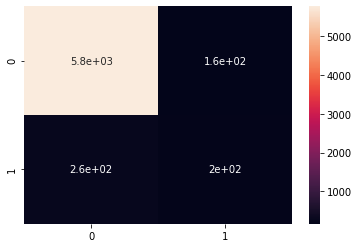

In [50]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)

In [51]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      5931
           1       0.55      0.43      0.48       462

    accuracy                           0.93      6393
   macro avg       0.75      0.70      0.72      6393
weighted avg       0.93      0.93      0.93      6393

